In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import matplotlib.pyplot as plt
import numpy as np
from The_Payne import utils

In [43]:
import torch

In [22]:
model_grid = utils.get_model_grid()

In [40]:
print(np.shape(model_grid['teff']))

selection = (
    (model_grid['teff'] < 7000) &
    (model_grid['teff'] > 3750) &
    (model_grid['feh'] > -1)
    )
print(np.shape(model_grid['teff'][selection]))

labels = np.array([model_grid[key][selection] for key in ['teff','logg','feh','alpha_fe']])

(12298,)
(4297,)


In [2]:
size = 1000

In [3]:
# read in whole GALAH model grid
model_grid = utils.get_model_grid()
# make random choice reproducable
np.random.seed(3)
# now select 'size' entries from the model_grid, if the 'size' is not larger than the actual model grid
if size <= np.shape(model_grid['teff'])[0]:
    training_array = np.random.choice(np.arange(np.shape(model_grid['teff'])[0]),size=size,replace=False)
else:
    print('The model grid has only '+str(np.shape(model_grid['teff'])[0])+' entries')

# select the labels and spectra from the chosen indices
labels = np.array([model_grid[key][training_array] for key in ['teff','logg','feh','alpha_fe']])
spectra = model_grid['smod'][training_array]
if 'wavelength' not in locals():
    wavelength = utils.load_wavelength_array(survey='galah')
spectra = np.array([np.interp(wavelength, model_grid['wavelength'], spectra[x]) for x in range(size)])

# we select/redefine 1/5 of the training set as validation set, the rest as training set
fifth = int(size/5)
print('Whole training set: '+str(size))
print('Redefined training set ('+str(size-fifth)+') and validation set ('+str(fifth)+')')
print(fifth)
training_labels = (labels.T)[:size-fifth,:]
training_spectra = (spectra[:size-fifth,:]).astype(np.float64)
validation_labels = (labels.T)[size-fifth:,:]
validation_spectra = (spectra[size-fifth:,:]).astype(np.float64)

Whole training set: 1000
Redefined training set (800) and validation set (200)
200


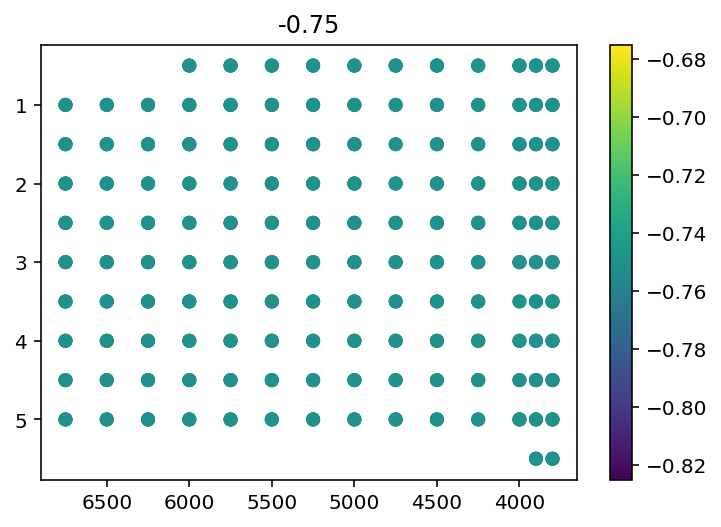

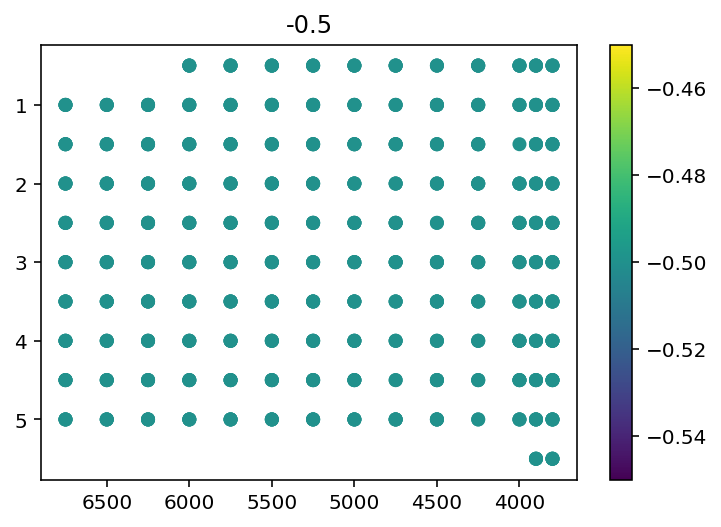

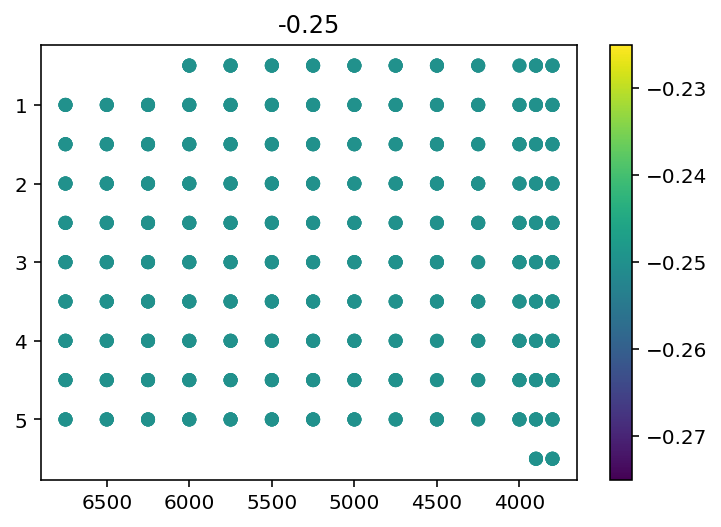

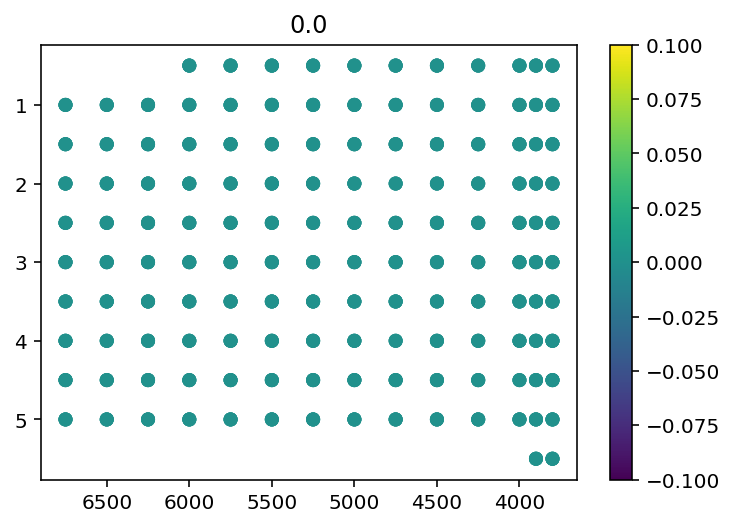

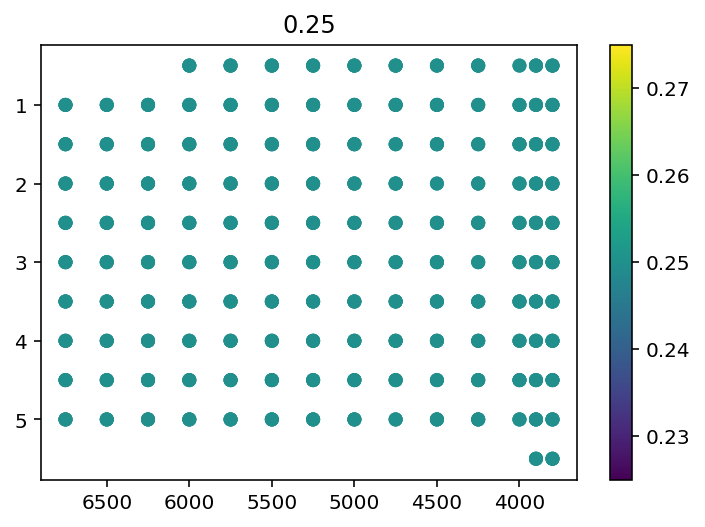

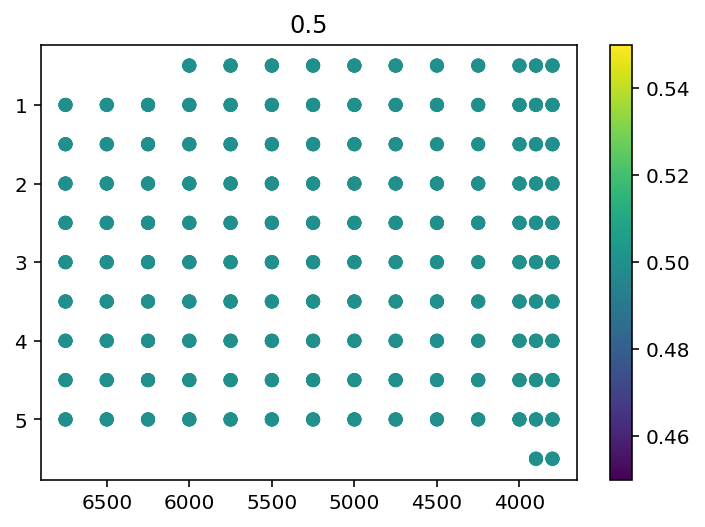

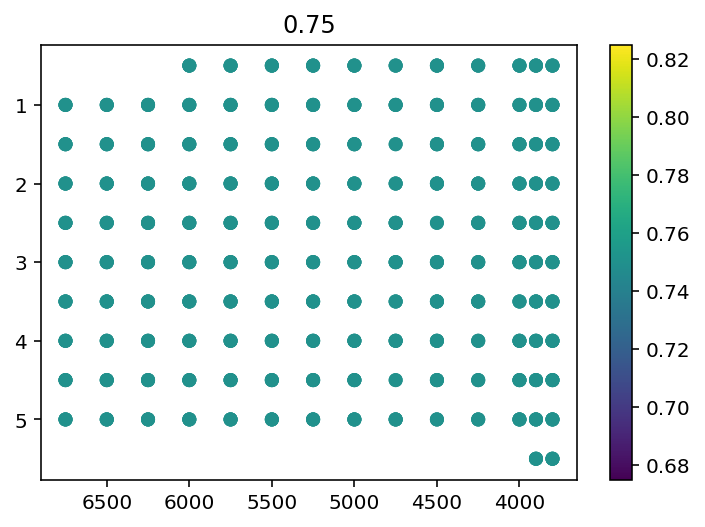

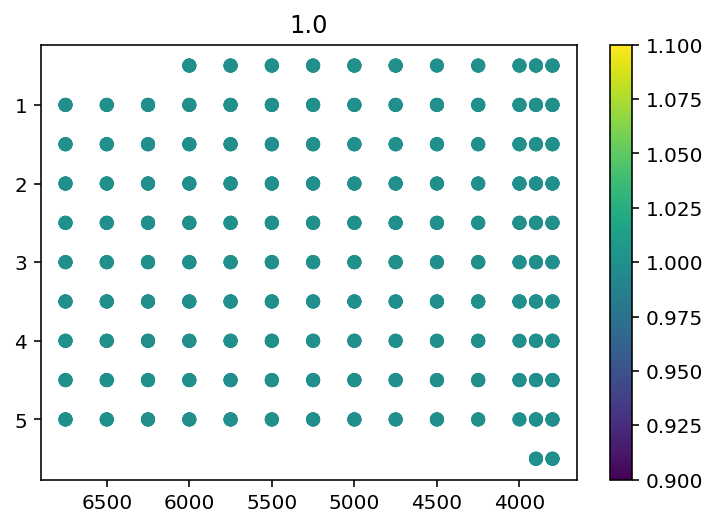

In [41]:
for each_feh in np.unique(labels[2]):
    has_that_feh = (labels[2] == each_feh)
    
    f, ax=plt.subplots()
    s=ax.scatter(labels[0][has_that_feh],labels[1][has_that_feh],c=labels[2][has_that_feh])
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.colorbar(s,ax=ax)
    ax.set_title(str(each_feh))

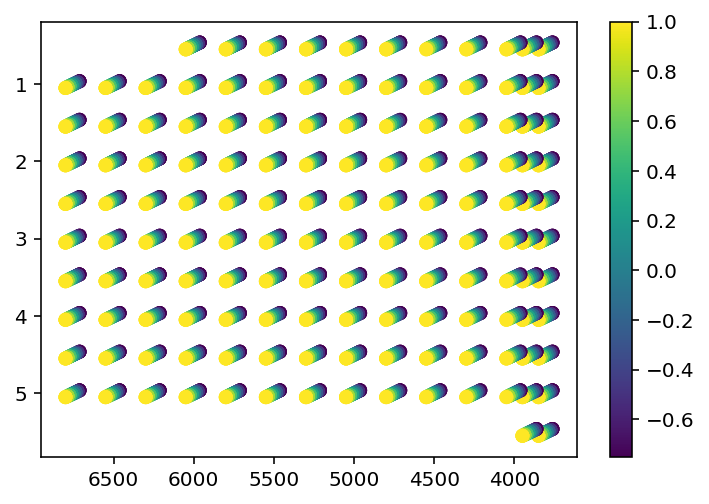

In [42]:
f, ax=plt.subplots()
s=ax.scatter(labels[0]+50*labels[2],labels[1]+0.05*labels[2],c=labels[2])
ax.invert_xaxis()
ax.invert_yaxis()
plt.colorbar(s,ax=ax)

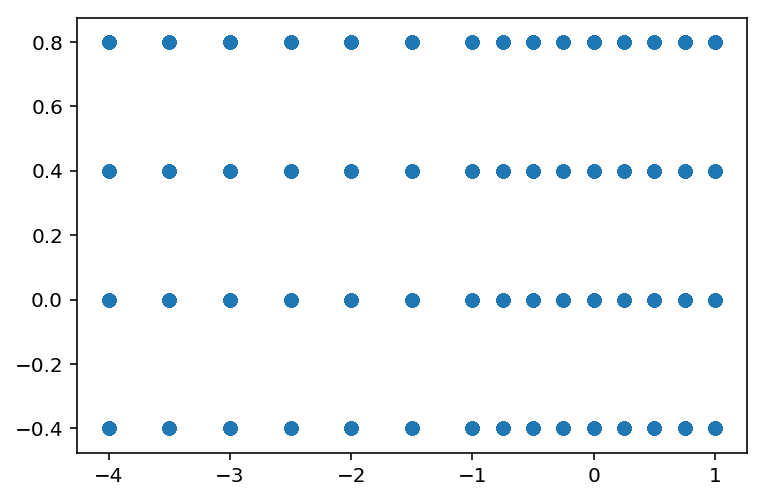

In [5]:
plt.scatter(labels[2],labels[3])